in week-4 we are going to Specify ```Data Sources``` and ```Data Pre-processing``` in our project. 

## Analyzing the World Happiness Data


### Preparing the data for analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# pd.options.display.float_format = '{:.2f}'.format

Create a Pandas dataframe named ```dfraw``` by reading in the data in the worksheet named "Table2.1" from the spreadsheet "World_Health_Report_Data_2018.xls".

In [2]:
dfraw = pd.read_excel("WHR2023.xlsx")
dfraw

,Country name,Continent,ContinentID,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,Asia,2,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,Asia,2,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,Asia,2,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,Asia,2,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,Asia,2,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,Africa,1,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2195,Zimbabwe,Africa,1,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2196,Zimbabwe,Africa,1,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2197,Zimbabwe,Africa,1,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682


After going over the dataset, we found out not all the columns are interesting to do our analysis. In the code cell below, the variable cols_to_include contains a list of column names to extract. Execute the cell.

In [3]:
cols_to_include = ['Country name',
'year',
'Life Ladder',
'Log GDP per capita',
'Social support',
'Healthy life expectancy at birth',
'Freedom to make life choices',
'Generosity',
'Perceptions of corruption',
'Positive affect',
'Negative affect']


### creating a new dataframe named `df` that includes the subset of data in `cols_to_include`.

In [4]:
df = dfraw[cols_to_include]

Take a look at the head of the new dataframe

In [5]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919


to have a better understanding of the data we use ```describe()``` method. The ```describe``` method on a dataframe provides a useful statistical summary of the data. But we don't need some unimportant data such as standard deviation of year and also, to be more informative we make the result transpose.

In [6]:
df2 = df.describe().T
df2.drop(labels='year', axis=0, inplace = True)
df2

,count,mean,std,min,25%,50%,75%,max
Life Ladder,2199.0,5.479226,1.125529,1.281271,4.646750,5.432437,6.309460,8.018934
Log GDP per capita,2179.0,9.389766,1.153387,5.526723,8.499764,9.498955,10.373216,11.663788
Social support,2186.0,0.810679,0.120952,0.228217,0.746609,0.835535,0.904792,0.987343
Healthy life expectancy at birth,2145.0,63.294583,6.901104,6.720000,59.119999,65.050003,68.500000,74.474998
Freedom to make life choices,2166.0,0.747858,0.140150,0.257534,0.656528,0.769821,0.859382,0.985178
Generosity,2126.0,0.000096,0.161083,-0.337527,-0.112116,-0.022671,0.092070,0.702708
Perceptions of corruption,2083.0,0.745195,0.185837,0.035198,0.688139,0.799654,0.868827,0.983276
Positive affect,2175.0,0.652143,0.105922,0.178886,0.571684,0.663063,0.737936,0.883586
Negative affect,2183.0,0.271501,0.086875,0.082737,0.207660,0.260671,0.322894,0.704590


So, based on the observations, We write a function, that applies describe() method on it and doea some renaming on the result of describe() method columns, shows it in transpose style and drops some unimportant columns of it. later on we can use the output for the further analysis.

In [7]:
def produce_summary_table(df):
#     step 4:
    column_renaming = {'count': 'N', 'mean': 'Mean', 'std': 'Std. Dev.', 'min': 'Min.', 'max': 'Max.'}
    column_order = ['Mean', 'Std. Dev.', 'Min.', 'Max.', 'N']
    df2= df.describe().T
    df2.drop(index=['year'], inplace=True)
    df2.drop(columns=['25%', '50%', '75%'], inplace= True)
    df3 = df2.rename(column_renaming, axis=1)
    dfsummary = df3[['Mean', 'Std. Dev.', 'Min.', 'Max.', 'N']]
    dfsummary
#     step 5
    dfsummary['N'] = dfsummary['N'].astype(int)
    dfsummary
    
    return dfsummary

In [8]:
summary = produce_summary_table(dfraw)
summary

,Mean,Std. Dev.,Min.,Max.,N
ContinentID,2.567531,1.391793,1.000000,6.000000,2199
Life Ladder,5.479226,1.125529,1.281271,8.018934,2199
Log GDP per capita,9.389766,1.153387,5.526723,11.663788,2179
Social support,0.810679,0.120952,0.228217,0.987343,2186
Healthy life expectancy at birth,63.294583,6.901104,6.720000,74.474998,2145
Freedom to make life choices,0.747858,0.140150,0.257534,0.985178,2166
Generosity,0.000096,0.161083,-0.337527,0.702708,2126
Perceptions of corruption,0.745195,0.185837,0.035198,0.983276,2083
Positive affect,0.652143,0.105922,0.178886,0.883586,2175
Negative affect,0.271501,0.086875,0.082737,0.704590,2183


### summary for a specific period of time:
we create can dataframes for a specific year ranges, here ```range(2005,2007)``` to have an extra information for a specific time period:

In [9]:
df = pd.read_excel('WHR2023.xlsx')
dfraw = df[df.year.isin(range(2005,2007))]
dfsummary_05_07 = produce_summary_table(dfraw)
dfsummary_05_07

,Mean,Std. Dev.,Min.,Max.,N
ContinentID,2.741379,1.445357,1.000000,6.000000,116
Life Ladder,5.487704,1.178512,3.202429,8.018934,116
Log GDP per capita,9.313933,1.208135,6.791730,11.433055,115
Social support,0.850170,0.108882,0.435414,0.978840,116
Healthy life expectancy at birth,61.677044,9.117312,6.720000,72.400002,115
Freedom to make life choices,0.752830,0.139292,0.281458,0.971135,111
Generosity,0.005257,0.168844,-0.309966,0.438292,82
Perceptions of corruption,0.746510,0.189431,0.132430,0.982931,108
Positive affect,0.663317,0.101061,0.352652,0.837169,114
Negative affect,0.254862,0.068770,0.094316,0.469419,114


### renaming
In order to make the data a bit easier to work with, we are going to rename the column headers to be shorter, using the df.rename method. We will do these renaming based on the definition of each column that is provided in the PDF that come along with dataset. For example, what is called ```Life Ladder``` in the original data, we will now refer to as ```Happiness```; or  ```Log GDP per capita```is renamed as ```LogGDP```, etc.

In [10]:
cols_to_include = ['Country name',
'year',
'Life Ladder',
'Log GDP per capita',
'Social support',
'Healthy life expectancy at birth',
'Freedom to make life choices',
'Generosity',
'Perceptions of corruption',
'Positive affect',
'Negative affect']

renaming = {'Life Ladder': 'Happiness', 
            'Log GDP per capita': 'LogGDP', 
            'Social support': 'Support', 
            'Healthy life expectancy at birth': 'Life', 
            'Freedom to make life choices': 'Freedom', 
            'Perceptions of corruption': 'Corruption', 
            'Positive affect': 'Positive', 
            'Negative affect': 'Negative'}
df = df[cols_to_include].rename(renaming, axis=1)
print(df.columns)

Index(['Country name', 'year', 'Happiness', 'LogGDP', 'Support', 'Life',
       'Freedom', 'Generosity', 'Corruption', 'Positive', 'Negative'],
      dtype='object')


To visualize all the ```pairwise relationships``` among variablesa, we use a grid of ```scatterplots``` for each pair of variables

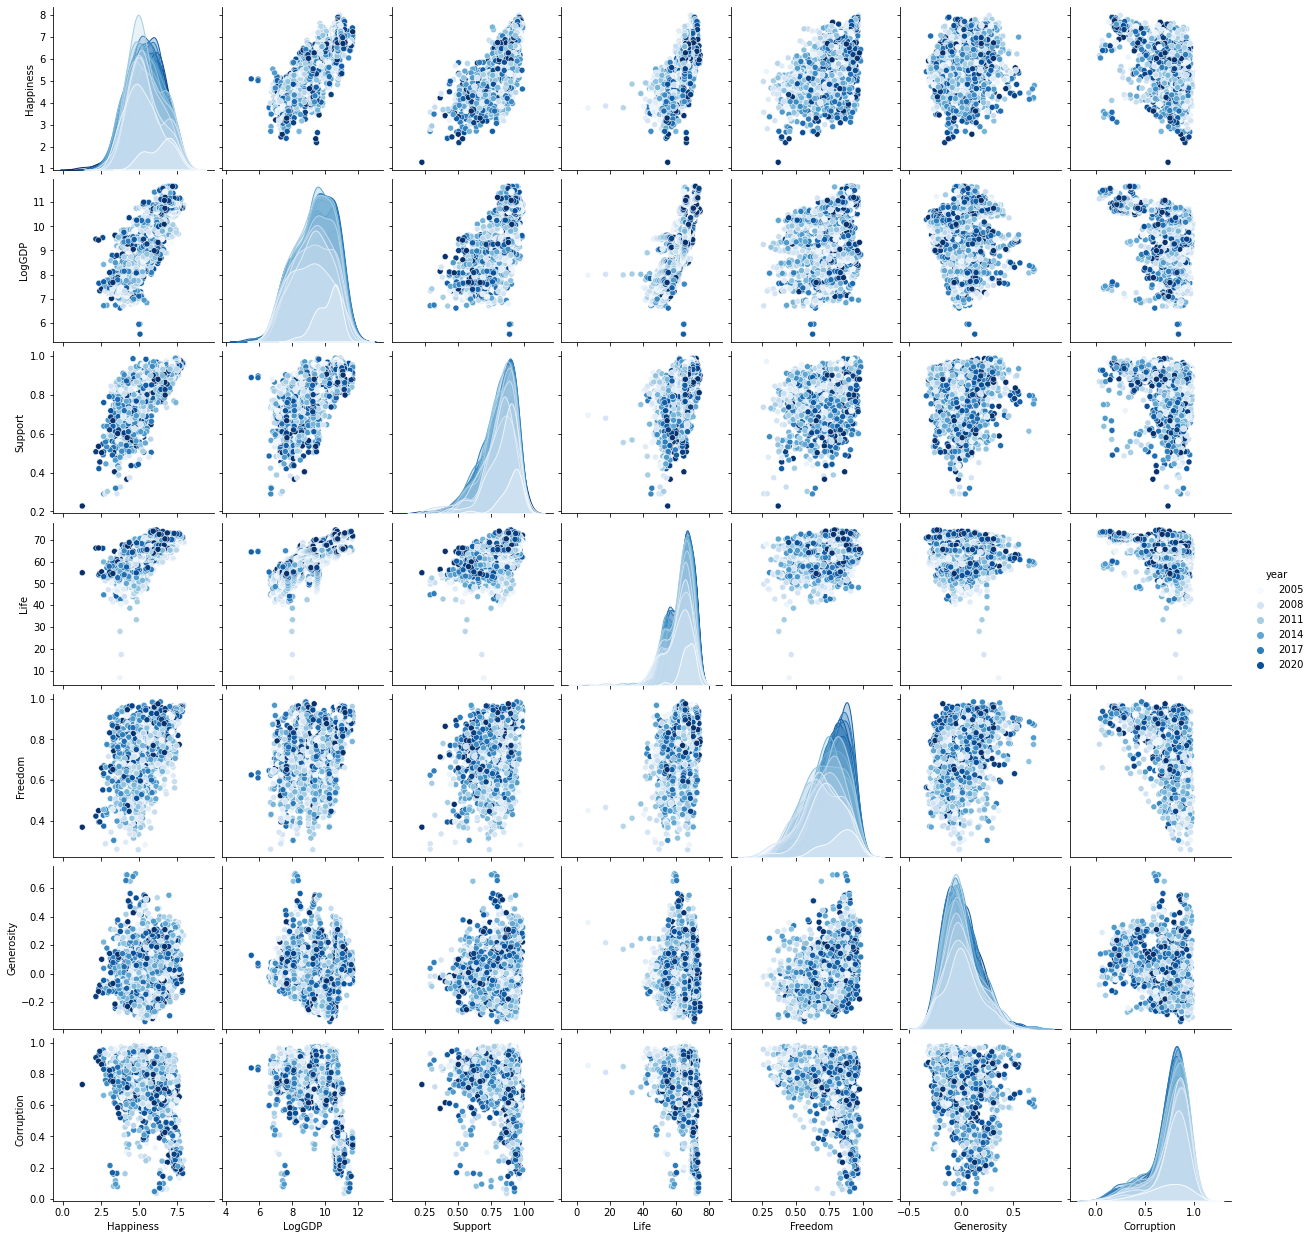

In [11]:
explanatory_vars = ['LogGDP','Support','Life','Freedom','Generosity','Corruption']
# the tricky part of this exercise was including 'year' in plot_vars eventhough it was not mentioned
# clearly in the question. we can not compute the variance of variable 'year', so, automatically will
# not bee seen on the grid, and it will be use only fo hue option
plot_vars = df[['Happiness','year'] + explanatory_vars]
sns.pairplot(plot_vars, hue= 'year',dropna=True, palette='Blues')



By inspecting the scatterplots above, we can see that some variables (such as LogGDP, Support, and Life) show some positive correlation with Happiness, whereas other variables show little correlation.  The Corruption data appears to show something of a negative correlation with Happiness.

To give a visual information about the data, we can use GeoPandas package to mape the countries on the globe, for a specific year. we might need to
*  !pip install geopandas
* do some renaming stuff on countries name, such as changing USA to United States, etc.


In [12]:
!pip install geopandas
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

country_names = {'Bosnia and Herz.': 'Bosnia and Herzegovina',
                    'Central African Rep.': 'Central African Republic',
                    'Congo': 'Congo (Brazzaville)',
                    'Dem. Rep. Congo': 'Congo (Kinshasa)',
                    'Czechia': 'Czech Republic',
                    "Côte d'Ivoire": 'Ivory Coast',
                    'Dominican Rep.': 'Dominican Republic',
                    'N. Cyprus': 'North Cyprus',
                    'Palestine': 'Palestinian Territories',
                    'Somaliland': 'Somaliland region',
                    'S. Sudan': 'South Sudan',
                    'eSwatini': 'Swaziland', 
                    'Taiwan': 'Taiwan Province of China',
                    'United States of America': 'United States'}

world = world.replace(to_replace=country_names)

C:\Users\Ty\AppData\Local\Temp/ipykernel_35344/2537334958.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [13]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Because both the WHR dataframe and the world geodataframe contain columns listing country names, we can use those shared names to merge the two in order to produce a new geodataframe containing both the geography information and the WHR data

In [14]:
world_with_data = world.merge(df, left_on='name', right_on='Country name', how='outer')
world_with_data.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country name,year,Happiness,LogGDP,Support,Life,Freedom,Generosity,Corruption,Positive,Negative
0,889953.0,Oceania,Fiji,FJI,5496.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2006.0,3.922484,7.459785,0.782916,50.759998,0.786859,-0.026905,0.649105,0.725443,0.209238
2,58005463.0,Africa,Tanzania,TZA,63177.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2007.0,4.317950,7.497267,0.707852,51.419998,0.715832,-0.012575,0.706752,0.702124,0.219853
3,58005463.0,Africa,Tanzania,TZA,63177.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2008.0,4.384742,7.525330,0.774360,52.080002,0.562212,0.255990,0.930032,0.739763,0.178047
4,58005463.0,Africa,Tanzania,TZA,63177.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2009.0,3.407508,7.551692,0.836828,52.740002,0.606549,0.308239,0.902627,0.733148,0.160527


### plotting Happines on GeoPandas:
We want to plot a Happiness map (chloropleth):
* First, drawing an outline of all the countries from the ```world``` dataframe as a base layer
* Next, plotting the Happiness data on top of the base layer

<AxesSubplot:>

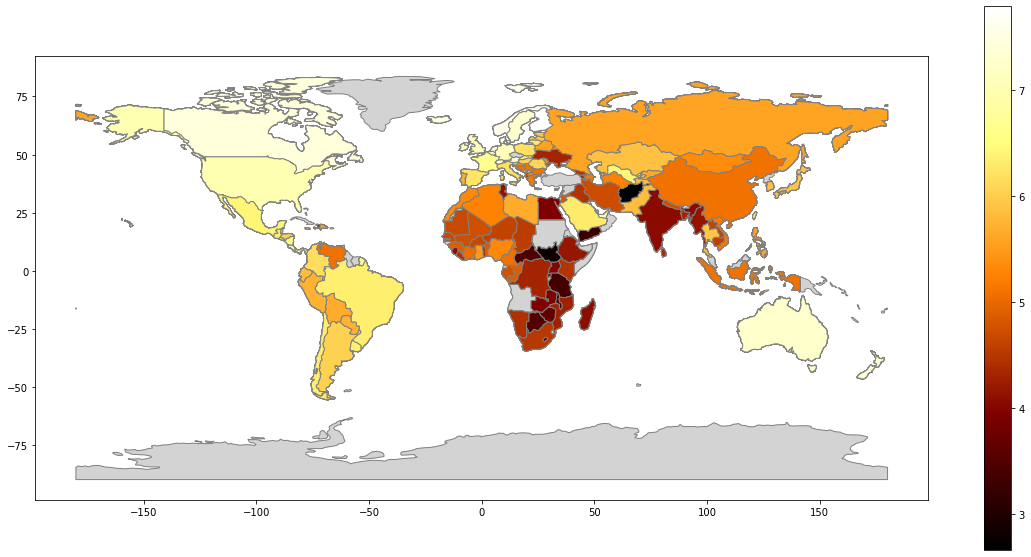

In [15]:
base = world_with_data.plot(color='lightgray', edgecolor='gray', figsize=(20,10))
world_with_data[world_with_data.year==2017].plot('Happiness', ax=base, cmap='afmhot', edgecolor='gray', legend=True)

We are going to get the correlation amin features between 2015-2018. We use ```corr()``` method in pandas

In [16]:
df1517 = df[df.year.isin(range(2015,2018))]
correlations = df1517.corr()
correlations

,year,Happiness,LogGDP,Support,Life,Freedom,Generosity,Corruption,Positive,Negative
year,1.000000,0.021688,-0.000696,0.022342,0.011127,0.100486,-0.063868,-0.018986,-0.037242,0.058866
Happiness,0.021688,1.000000,0.806540,0.744297,0.766228,0.530357,0.186507,-0.424085,0.508605,-0.463527
LogGDP,-0.000696,0.806540,1.000000,0.704395,0.855146,0.341530,0.037982,-0.340602,0.250439,-0.424801
Support,0.022342,0.744297,0.704395,1.000000,0.678081,0.373925,0.091226,-0.229595,0.418509,-0.575417
Life,0.011127,0.766228,0.855146,0.678081,1.000000,0.325596,0.047735,-0.297034,0.233057,-0.395355
Freedom,0.100486,0.530357,0.341530,0.373925,0.325596,1.000000,0.336690,-0.492753,0.597793,-0.352248
Generosity,-0.063868,0.186507,0.037982,0.091226,0.047735,0.336690,1.000000,-0.369095,0.294273,-0.096632
Corruption,-0.018986,-0.424085,-0.340602,-0.229595,-0.297034,-0.492753,-0.369095,1.000000,-0.317007,0.335607
Positive,-0.037242,0.508605,0.250439,0.418509,0.233057,0.597793,0.294273,-0.317007,1.000000,-0.335093
Negative,0.058866,-0.463527,-0.424801,-0.575417,-0.395355,-0.352248,-0.096632,0.335607,-0.335093,1.000000


Visualization of the correlation matrix is useful with a ```heatmap```

<AxesSubplot:>

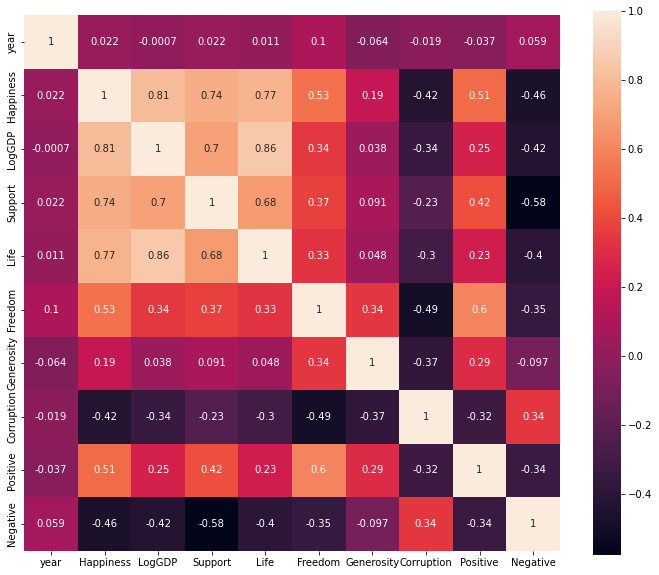

In [34]:
plt.figure(figsize=(12,10))
sns.heatmap(correlations, annot=True, square=True)

### information got from correlation heatmap:
the patterns of positive and negative correlation.  We noticed previously that LogGDP, Support, and Life all showed reasonably strong positive correlation with Happiness, and that Corruption showed negative correlation.  That is explicitly shown here.  And because we computed correlations over all columns of the dataframe, we also see information about the correlation of each variable with year.  The fact that no variable shows particularly strong correlation (positive or negative) with year indicates that the data are approximately constant over time

### plotting regression
we will use ```regplot``` method (short for regression plot) that both presents a scatterplot of a pair of variables and estimates a linear regression of the data.  


<AxesSubplot:xlabel='LogGDP', ylabel='Happiness'>

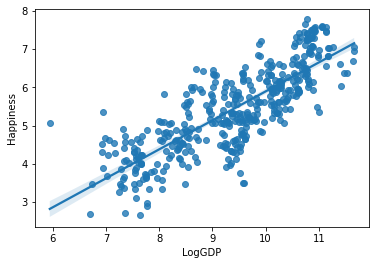

In [18]:
sns.regplot(x= "LogGDP", y= "Happiness" , data= df1517 )

 examine the relationship between 'Happiness' on the y-axis and 'Generosity' on the x-axis

<AxesSubplot:xlabel='Generosity', ylabel='Happiness'>

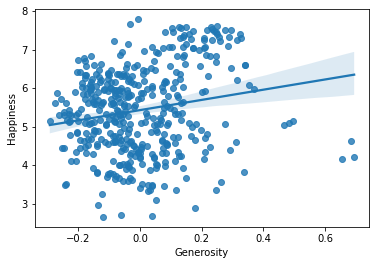

In [19]:
sns.regplot(x= "Generosity", y= "Happiness", data = df1517)

This is good information but still we need a lot more quantitative information

The World Happiness Report is generally interested in how self-reported Happiness (Life Ladder) is dependent on the variety of different factors that they measure (LogGDP, Support, Life, etc.).  The report carries out a detailed analysis explaining how much of each country's Happiness can be ascribed to each of the explanatory factors.

### Grouping together subsets of data via split-apply-combine
we will apply the split-apply-combine methodology to take advantage of substructure within the WHR panel data

In [20]:
#  The groupby method on a dataframe puts entries into groups that share a common label.
df.groupby(pd.cut(df.Happiness, bins=list(range(0,11)))).mean()
#  we use cut() method when we need to segment and sort data values into bins.

,year,Happiness,LogGDP,Support,Life,Freedom,Generosity,Corruption,Positive,Negative
Happiness,,,,,,,,,,
"(0, 1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(1, 2]",2022.000000,1.281271,NaN,0.228217,54.875000,0.368377,NaN,0.733198,0.205868,0.575512
"(2, 3]",2016.285714,2.702060,7.788373,0.515454,55.190952,0.524644,-0.037135,0.854707,0.461927,0.432510
"(3, 4]",2013.615385,3.650911,7.931598,0.662567,53.907280,0.666937,-0.000182,0.768500,0.600477,0.288650
"(4, 5]",2013.638699,4.548377,8.506341,0.736779,58.576447,0.683109,-0.009244,0.802258,0.606403,0.300118
"(5, 6]",2014.123145,5.484483,9.457224,0.824115,64.342190,0.731834,-0.038954,0.807509,0.635364,0.274133
"(6, 7]",2015.111111,6.440673,10.258676,0.888354,67.955075,0.812786,-0.000959,0.723849,0.708832,0.248882
"(7, 8]",2013.864000,7.341389,10.748317,0.933160,70.138100,0.894136,0.135406,0.466172,0.748396,0.215062
"(8, 9]",2005.000000,8.018934,10.849012,0.972372,68.300003,0.971135,NaN,0.236522,0.776689,0.153672


The ```index``` represent ```Happiness bins```: from 0 to 1, 1 to 2, etc., on up to 9 to 10. These bins, or intervals, are regions defined by two endpoints: a lower value and an upper value.
* the interval labeled as (2, 3] refers to an interval where Happiness is greater than 2 and less than or equal to 3

We can also, ```group``` the WHR data into 10 bins in ```LogGDP```, and compute the total number of entries in each bin by applying the size method

In [21]:
LogGDP_bins = df.groupby((pd.cut(df.LogGDP, bins = 10))).size()
LogGDP_bins

LogGDP
(5.521, 6.14]        3
(6.14, 6.754]        8
(6.754, 7.368]     101
(7.368, 7.982]     202
(7.982, 8.595]     291
(8.595, 9.209]     261
(9.209, 9.823]     449
(9.823, 10.436]    360
(10.436, 11.05]    430
(11.05, 11.664]     74
dtype: int64

We can see what the distribution of LogGDP values produced by this cut looks like:

<AxesSubplot:xlabel='LogGDP'>

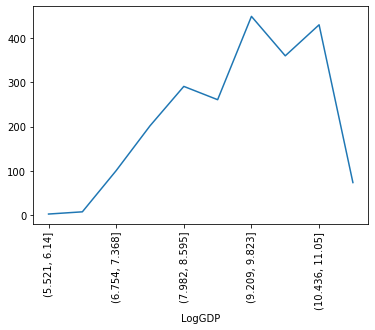

In [22]:
LogGDP_bins.plot(rot=90)

### We can use these grouping for the further higher level of analysis

In [23]:
# looking for correlation:
corr_matrix = df.corr()
corr_matrix['Happiness'].sort_values(ascending=False)

Happiness     1.000000
LogGDP        0.784871
Support       0.721663
Life          0.713493
Freedom       0.534532
Positive      0.518207
Generosity    0.181658
year          0.045943
Negative     -0.339992
Corruption   -0.431569
Name: Happiness, dtype: float64

The most promissing attribute to predict the Happiness are the Log GDP, Life, Support. So we zoom in their correlation scatterplot

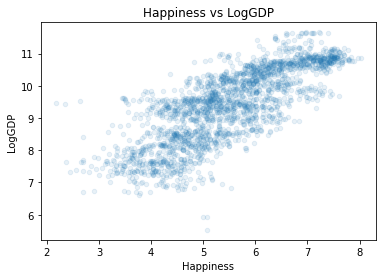

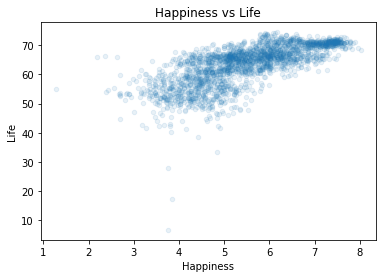

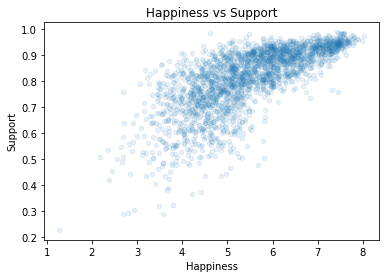

In [24]:
cor_items = ['LogGDP', 'Life', 'Support']
for item in cor_items:
    df.plot(kind="scatter", x='Happiness', y= item, alpha=0.1, title='Happiness vs '+item)

# Preparing data for ML Algorithms

### Data Cleaning

In [25]:
#  filling Nan values with medians,
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country name  2199 non-null   object 
 1   year          2199 non-null   int64  
 2   Happiness     2199 non-null   float64
 3   LogGDP        2179 non-null   float64
 4   Support       2186 non-null   float64
 5   Life          2145 non-null   float64
 6   Freedom       2166 non-null   float64
 7   Generosity    2126 non-null   float64
 8   Corruption    2083 non-null   float64
 9   Positive      2175 non-null   float64
 10  Negative      2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


### Another way to see number of missing values in each row

In [26]:
num_missing = df.isnull().sum(axis = 0)
num_missing

Country name      0
year              0
Happiness         0
LogGDP           20
Support          13
Life             54
Freedom          33
Generosity       73
Corruption      116
Positive         24
Negative         16
dtype: int64

### as we see, LogGDP, Support and Life that we are more intrested in, have some missing values

We have two options, using ```panda``` or ```SimpleImputer``` from sklearn.impute

In [27]:
# We could use SimpleImputer module, but we can do it simply by panda.
# TO implement with SimpleImputer, uncomment this part. create a SimpleImputer instance, specifying that you want to replace 
# each attribute’s missing values with the median
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='median')

# Note, this only works on numerical values, 
# if dataset has categorical values, we should make a coupy of numerical values and work on that copy
# df_num = df.drop("country",axis=1,inplace=True)
# df_num = df.drop("Happiness_cat",axis=1,inplace=True)
# #fit the imputer instance to the training data 
# imputer.fit(df)

In [28]:
# We use Pandas
df1 = df.fillna(df.mean(axis = 0))


C:\Users\Ty\AppData\Local\Temp/ipykernel_35344/910536219.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1 = df.fillna(df.mean(axis = 0))


In [29]:
# we shouldn't have any missing value
num_missing = df1.isnull().sum(axis = 0)
num_missing

Country name    0
year            0
Happiness       0
LogGDP          0
Support         0
Life            0
Freedom         0
Generosity      0
Corruption      0
Positive        0
Negative        0
dtype: int64

In [30]:
df1.head()

,Country name,year,Happiness,LogGDP,Support,Life,Freedom,Generosity,Corruption,Positive,Negative
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919


Ass we see all missing values are fixed in in the next cell

We have ```country``` name as a categorical value, we can turn it to numerical by. If so, uncomment and run the following code

In [31]:
dfr_cat = df1[['Country name']]
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
df1_cat_1hot = cat_encoder.fit_transform(dfr_cat)
df1_cat_1hot
# Notice that the output is a SciPy sparse matrix
# if you really want to con‐vert it to a (dense) NumPy array, just call the toarray() method
df1_cat_1hot.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

 you can get the list of categories

In [32]:
cat_encoder.categories_

[array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
        'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
        'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
        'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
        'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
        'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
        'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
        'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
        'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
        'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
        'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
        'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
        'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
        'Ivory Coast', 'Jama

### to get all attributes to have the same scale:
To scale our data we don't use StandardScaler because all our data is not normally distributed
We use MinMax because it works well with this situation and also we don't have any outlier.

In [33]:
df1['Country name']=df1_cat_1hot

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [ ]:
df1.head()

# Starting week 5, 6 and 7
### classification (classifying countries based on their numerical values such as happiness)

We will revisit the World Happiness Report (WHR) data for this exercise, bringing in some additional information that will enable us to formulate a classification problem to predict categorical labels on the dataset.
We start from the beginning to show what we have done in this classification

In [ ]:
dfraw = pd.read_excel('World_Health_Report_Data_2018.xls', sheet_name='Table2.1')
cols_to_include = ['country', 'year', 'Life Ladder', 
                   'Positive affect','Negative affect',
                   'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth', 
                   'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption']
renaming = {'Life Ladder': 'Happiness', 
            'Log GDP per capita': 'LogGDP', 
            'Social support': 'Support', 
            'Healthy life expectancy at birth': 'Life', 
            'Freedom to make life choices': 'Freedom', 
            'Perceptions of corruption': 'Corruption', 
            'Positive affect': 'Positive', 
            'Negative affect': 'Negative'}
df = dfraw[cols_to_include].rename(renaming, axis=1)
key_vars = ['Happiness', 'LogGDP', 'Support', 'Life', 'Freedom', 'Generosity', 'Corruption', 'Positive', 'Negative']
df.head

### Step 1.

We will first augment the core WHR dataset that we have been working with to bring in some additional information that is included in a different worksheet in the WHR spreadsheet.  Since this is mostly about data processing rather than machine learning

In [ ]:
# read in data from SupportingFactors worksheet into a new dataframe dfsupp
dfsupp = pd.read_excel('WHR2023.xlsx', sheet_name='SupportingFactors')

# extract out region information from SupportingFactors dataframe
regions = dfsupp[['country', 'Region indicator']].rename({'Region indicator': 'region'}, axis=1)

# examine head of regions dataframe -- each country has an associated world region
regions.head()

In [ ]:
# compute the mean values of all the WHR data for each country, averaging over all years in the dataset
dfmean = df.groupby('country').mean().drop('year', axis=1)

# merge the mean WHR data with the region information extracted previously
df2 = pd.merge(dfmean, regions, on='country').dropna()

# set the index of df2 to be the country name
df2.set_index('country', inplace=True)

# examine head of df2 dataframe -- mean WHR values for each country, along with associated regions
df2.head()

we want to use df2 for machine learning classification. For each country in the dataset, we have a set of mean numerical values ('Happiness', 'Positive', 'Negative', etc., which are all listed in the variable key_vars defined above) and a categorical value ('region'). We would like to know if the raw numerical data are predictive of the region. In other words, if someone gave you a set of numerical data on Happiness, etc. for an unknown country, would you be able to predict what region of the world it might be located in?
we will train a model based on the numerical data and the associated labels (regions).

we first want to extract and process some data from our ```df2``` dataframe.  We need to separate the data into two parts:
* the region data that we want to be able to predict (we'll call it ```y```)
* the WHR numerical data that we want to use as input to our prediction (we'll call it ```x```)


In [ ]:
x = df2[['Happiness', 'LogGDP', 'Support', 'Life', 'Freedom', 'Generosity', 'Corruption', 'Positive', 'Negative']]
y = df2['region']
print("shape of x is: ",x.shape)
print("shape of y is: ",y.shape)

 There are 152 samples (countries), and 9 features (each of the key_vars) that we are making predictions from.

due to variation in numerical values, we z-scored the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns = x.columns, index = x.index)

x_scaled.head()

# Step 2.

Now that the data have been preprocessed, we can begin with our classification analysis
### implementing SVM and DT

In [ ]:
from sklearn import svm, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# train_test_split function splits a dataset into separate training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y ,random_state=0 )
x_train.shape
x_test.shape
y_train.shape
y_test.shape

We will first consider SVMs, and then revisit the problem with Decision Trees

In [ ]:
clf1 = svm.SVC()
clf1.fit(x_train, y_train)
predictions1 = clf1.predict(x_test)
score1 = accuracy_score(y_test, predictions1)
score1

The accuracy score reported should be around 71% (0.71).  This means that approximately 29% of the countries in the test set had their regions mispredicted. HOwever this is not great, it could be that the WHR numerical data really are not always completely predictive of region; some countries that are "outliers" in a particular region, and more closely resemble other regions based on the WHR indicators.

This code cell loops over all the predicted and true values in the test set, and prints out the country name and predicted region when the prediction is incorrect.  An output line like: ```Sri Lanka : South Asia -> Sub-Saharan Africa``` means that Sri Lanka is actually part of the South Asia region but was predicted to be part of Sub-Saharan Africa.

In [ ]:
for i in range(len(y_test)):
    t = y_test[i]
    p = predictions1[i]
    country = x_test.index[i]
    if t != p:
        print(country, ':', t, '->', p)

### classification with DT

In [ ]:
clf2 = tree.DecisionTreeClassifier(random_state=0)
clf2.fit(x_train, y_train)
predictions2 = clf2.predict(x_test)
score2 = accuracy_score(y_test, predictions2)
score2

We ran two classifiers &mdash; ```clf1``` (SVM) and ```clf2``` (Decision Tree) &mdash; on a particular random `test_train_split` of the full dataset.  We can't really reach any conclusions about the relative performance of the two methods just by considering one split.  Given that ```train_test_split``` can produce different random splits, here we compare the two classifiers for different splits.

In [ ]:
for i in range (20):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y)
    clf1.fit(x_train, y_train)
    clf2.fit(x_train, y_train)
    predictions1 = clf1.predict(x_test)
    predictions2 = clf2.predict(x_test)
    score1 = accuracy_score(y_test, predictions1)
    score2 = accuracy_score(y_test, predictions2)
    print(score1, score2, score1-score2)

### Step 3.

We you printed out the scores of the two classifiers for a small number of random splits, and examined the numerical output. We generate a visual summary of the relative performance of the two classifiers, for a larger number of runs.


* The two empty lists named ```all_scores1``` and ```all_scores2``` will be used to collect the scores of each classifier each time through the loop
* We run through the loop 1000 times instead of 20 as before
* We append the scores (```score1``` and ```score2```) to each of the lists used to contain all the scores

In [ ]:
all_scores1 = []
all_scores2 = []
for i in range (1000):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y)
    clf1.fit(x_train, y_train)
    clf2.fit(x_train, y_train)
    predictions1 = clf1.predict(x_test)
    predictions2 = clf2.predict(x_test)
    score1 = accuracy_score(y_test, predictions1)
    score2 = accuracy_score(y_test, predictions2)
    all_scores1.append(score1)
    all_scores2.append(score2)
plt.hist(all_scores1, bins = 20, alpha = 0.3, label='all_scores1' )
plt.hist(all_scores2, bins = 20, alpha = 0.3, label='all_scores2')

### Predicting "continent" instead of "region"

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import seaborn as sns


In [36]:

# Continent was added and converted to an ID in Excel.
# The 6 values are Africa (1), Asia (2), Europe (3), North America(6), Oceania (5), South America (6)
dfraw2 = pd.read_excel("WHR2023.xlsx")


# Removing non numeric columns.
cols_to_include = ['ContinentID', 'year', 'Life Ladder', 
                   'Positive affect','Negative affect',
                   'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth', 
                   'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption']
df3 = dfraw2[cols_to_include]


# FIlling null values with that continent's mean in the column
print(df3.isnull().sum())
for col in df3:
    df3[col] = df3[col].fillna(df3.groupby('ContinentID')[col].transform('mean'))

df3.head()

ContinentID                           0
year                                  0
Life Ladder                           0
Positive affect                      24
Negative affect                      16
Log GDP per capita                   20
Social support                       13
Healthy life expectancy at birth     54
Freedom to make life choices         33
Generosity                           73
Perceptions of corruption           116
dtype: int64


C:\Users\Ty\AppData\Local\Temp/ipykernel_35344/3033255723.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[col] = df3[col].fillna(df3.groupby('ContinentID')[col].transform('mean'))


,ContinentID,year,Life Ladder,Positive affect,Negative affect,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,2,2008,3.723590,0.414297,0.258195,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686
1,2,2009,4.401778,0.481421,0.237092,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035
2,2,2010,4.758381,0.516907,0.275324,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766
3,2,2011,3.831719,0.479835,0.267175,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109
4,2,2012,3.782938,0.613513,0.267919,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620


In [37]:
X = df3.drop(["ContinentID"],axis=1)
y = df3['ContinentID']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42, shuffle=True) 

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

# Standardizing data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train shape: (1759, 10)
X_test shape: (440, 10)
y_train shape: (1759,)
y_test shape: (440,)


In [38]:
# Trying out various classification models

result_dict_train = {}
result_dict_test = {}

# K Nearest Neighbors
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
result_dict_train["KNN Train Score"] = np.mean(accuracies)
result_dict_test["KNN Test Score"] = knn.score(X_test,y_test)

# Logisitc Regression
reg = LogisticRegression(random_state = 42,  max_iter=1000)
accuracies = cross_val_score(reg, X_train, y_train, cv=5)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
result_dict_train["Logistic Train Score"] = np.mean(accuracies)
result_dict_test["Logistic Test Score"] = reg.score(X_test,y_test)

# SVM
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
result_dict_train["SVM Train Score"] = np.mean(accuracies)
result_dict_test["SVM Test Score"] = svc.score(X_test,y_test)

# Decision Tree
dtc = DecisionTreeClassifier(random_state = 42)
accuracies = cross_val_score(dtc, X_train, y_train, cv=5)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
result_dict_train["Decision Tree Train Score"] = np.mean(accuracies)
result_dict_test["Decision Tree Test Score"] = dtc.score(X_test,y_test)


# MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,10,10,10,10), activation='tanh', solver='adam', max_iter=500, random_state=42)
accuracies = cross_val_score(mlp, X_train, y_train, cv=5)
mlp.fit(X_train,y_train)
# predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
result_dict_train["MLP Train Score"] = np.mean(accuracies)
result_dict_test["MLP Test Score"] = mlp.score(X_test,y_test)


C:\Users\Ty\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


{'KNN Train Score': 0.8789189976689977, 'Logistic Train Score': 0.728265022015022, 'SVM Train Score': 0.8516219891219892, 'Decision Tree Train Score': 0.8050132737632737, 'MLP Train Score': 0.7947795260295261}

{'KNN Test Score': 0.8795454545454545, 'Logistic Test Score': 0.7659090909090909, 'SVM Test Score': 0.8431818181818181, 'Decision Tree Test Score': 0.7818181818181819, 'MLP Test Score': 0.8590909090909091}


C:\Users\Ty\AppData\Local\Temp/ipykernel_35344/1395481569.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_result_test.index,rotation = 75)


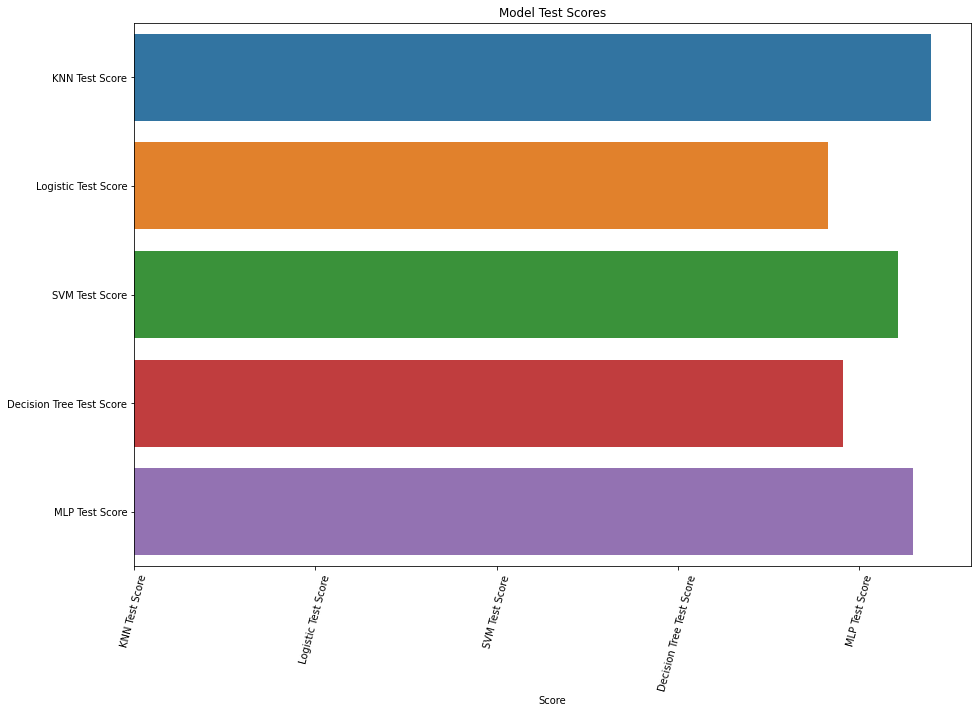

In [54]:
print(result_dict_train)
print()
print(result_dict_test)


df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index", columns=["Score"])
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])

fig,ax = plt.subplots(1,1,figsize=(15,10))
# sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0]).set(title='Train')
sns.barplot(y = df_result_test.index,x = df_result_test.Score,ax = ax).set(title='Model Test Scores')
# ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax.set_xticklabels(df_result_test.index,rotation = 75)
plt.show()

# The KNN and MLP models performed the best


# ```Huntley``` add your explanation/reasoning here if you wrote the nex cell

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10,10,10,10,10), activation='tanh', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

print(accuracy_score(y_test,predict_test))
